# Análise de Correlação: Motivação Geral x Percepção de Contribuição
Este notebook aplica o teste de correlação de Spearman para verificar se a metodologia da disciplina influenciou a motivação e percepção dos alunos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, wilcoxon


In [2]:
df = pd.read_csv("feedback.csv")
df.columns = df.columns.str.strip()

In [3]:
# Codificação da motivação por método
motiv_scale = {
    "Desmotivado(a)": 1,
    "Neutro(a)": 2,
    "Motivado(a)": 3,
    "Muito motivado(a)": 4
}

motiv_cols = ["Estudo de caso", "Survey", 
              "Revisão Sistemática da Literatura (RSL)", 
              "Análise Estatística de Experimentos", 
              "Análise Qualitativa"]

for col in motiv_cols:
    df[col] = df[col].map(motiv_scale)

df["Motivação Geral"] = df[motiv_cols].mean(axis=1)

# Codificação da percepção de contribuição
contrib_scale = {
    "Discordo totalmente": 1,
    "Discordo": 2,
    "Neutro": 3,
    "Concordo": 4,
    "Concordo totalmente": 5
}

df["Percepção Contribuição"] = df["Você acredita que a disciplina vai contribuir para sua formação?"] \
    .map(contrib_scale) \
    .fillna(3)


In [4]:
df[["Motivação Geral", "Percepção Contribuição"]].to_csv('aprendizado.csv', sep=',', index=False)

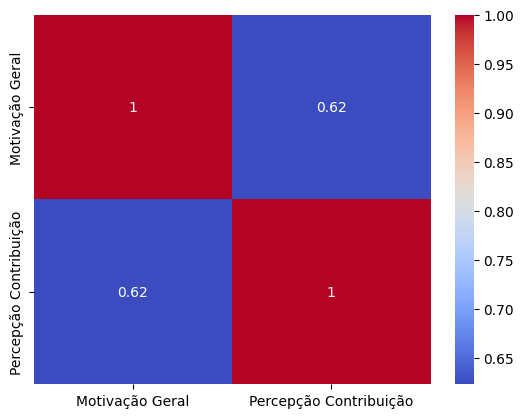

In [5]:
df = pd.read_csv("aprendizado.csv")
corr = df.corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [6]:
corr, p_value = spearmanr(df["Motivação Geral"], df["Percepção Contribuição"])

print(f"Correlação de Spearman: {corr:.2f}")
print(f"p-valor: {p_value:.4f}")

if p_value < 0.05:
    print("Resultado: Há uma correlação significativa entre motivação geral e percepção de contribuição.")
else:
    print("Resultado: Não há correlação significativa entre motivação geral e percepção de contribuição.")


Correlação de Spearman: 0.62
p-valor: 0.0005
Resultado: Há uma correlação significativa entre motivação geral e percepção de contribuição.


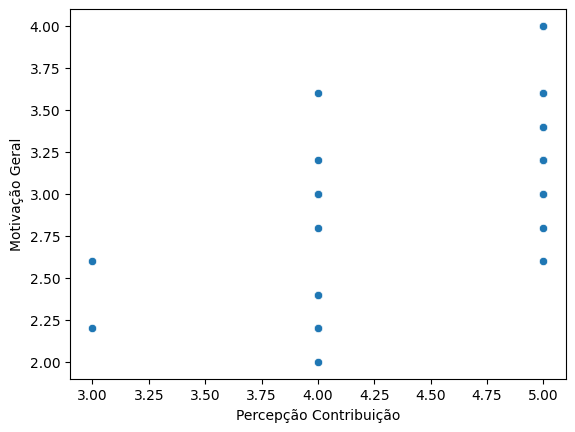

In [9]:
sns.scatterplot(data=df, x='Percepção Contribuição', y='Motivação Geral')
plt.show()

In [8]:
escala_conhecimento = {
    "nenhum conhecimento": 0,
    "pouco conhecimento": 1,
    "conhecimento razoável": 2,
    "domínio do conteúdo": 3
}

metodos = {
    "Tipos de estudos experimentais": (
        "Qual seu nível de conhecimento sobre tipos de estudos experimentais (primários, secundários e terciários) antes da disciplina?",
        "Qual seu nível de conhecimento sobre tipos de estudos experimentais (primários, secundários e terciários) após da disciplina?"
    ),
    "Experimento controlado": (
        "Qual seu nível de conhecimento sobre experimento controlado antes da disciplina?",
        "Qual seu nível de conhecimento sobre experimento controlado após a disciplina?"
    ),
    "Estudo de caso": (
        "Qual seu nível de conhecimento sobre estudo de caso antes da disciplina?",
        "Qual seu nível de conhecimento sobre estudo de caso após a disciplina?"
    ),
    "Survey": (
        "Qual seu nível de conhecimento sobre Survey antes da disciplina?",
        "Qual seu nível de conhecimento sobre Survey após a disciplina?"
    ),
    "Análise estatística": (
        "Qual seu nível de conhecimento sobre análise estatística de experimentos antes da disciplina?",
        "Qual seu nível de conhecimento sobre análise estatística de experimentos após a disciplina?"
    ),
    "Análise qualitativa": (
        "Qual seu nível de conhecimento sobre análise qualitativa antes da disciplina?",
        "Qual seu nível de conhecimento sobre análise qualitativa após a disciplina?"
    ),
    "RSL": (
        "Qual seu nível de conhecimento sobre revisão sistemática da literatura (RSL) antes da disciplina?",
        "Qual seu nível de conhecimento sobre revisão sistemática da literatura (RSL) após a disciplina?"
    )
}

interpretações = []


for metodo, (col_antes, col_depois) in metodos.items():
    antes = df[col_antes]
    depois = df[col_depois]

    dados_validos = (~antes.isna()) & (~depois.isna())

    if dados_validos.sum() >= 10:
        stat, p = wilcoxon(antes[dados_validos], depois[dados_validos])
        if p < 0.05:
            interpretacao = (
                f"Para a metodologia '{metodo}', observou-se uma diferença estatisticamente significativa "
                f"no nível de conhecimento dos alunos após a disciplina (Wilcoxon = {stat:.5f}, p = {p:.4f}), indicando um impacto positivo da abordagem."
            )
        else:
             interpretacao = (
                f"Para a metodologia '{metodo}', não foi observada diferença estatisticamente significativa "
                f"no nível de conhecimento dos alunos (Wilcoxon = {stat:.5f}, p = {p:.4f}), sugerindo que a metodologia pode não ter impactado significativamente."
            )
    else:
        interpretacao = (
            f"Para a metodologia '{metodo}', o número de respostas válidas foi insuficiente ({dados_validos.sum()} pares) "
            "para realizar uma análise estatística confiável."
        )

    interpretações.append(interpretacao)

KeyError: 'Qual seu nível de conhecimento sobre tipos de estudos experimentais (primários, secundários e terciários) antes da disciplina?'

In [13]:
interpretações

["Para a metodologia 'Tipos de estudos experimentais', observou-se uma diferença estatisticamente significativa no nível de conhecimento dos alunos após a disciplina (Wilcoxon = 4.00000, p = 0.0000), indicando um impacto positivo da abordagem.",
 "Para a metodologia 'Experimento controlado', observou-se uma diferença estatisticamente significativa no nível de conhecimento dos alunos após a disciplina (Wilcoxon = 0.00000, p = 0.0000), indicando um impacto positivo da abordagem.",
 "Para a metodologia 'Estudo de caso', observou-se uma diferença estatisticamente significativa no nível de conhecimento dos alunos após a disciplina (Wilcoxon = 0.00000, p = 0.0001), indicando um impacto positivo da abordagem.",
 "Para a metodologia 'Survey', observou-se uma diferença estatisticamente significativa no nível de conhecimento dos alunos após a disciplina (Wilcoxon = 0.00000, p = 0.0000), indicando um impacto positivo da abordagem.",
 "Para a metodologia 'Análise estatística', observou-se uma dife

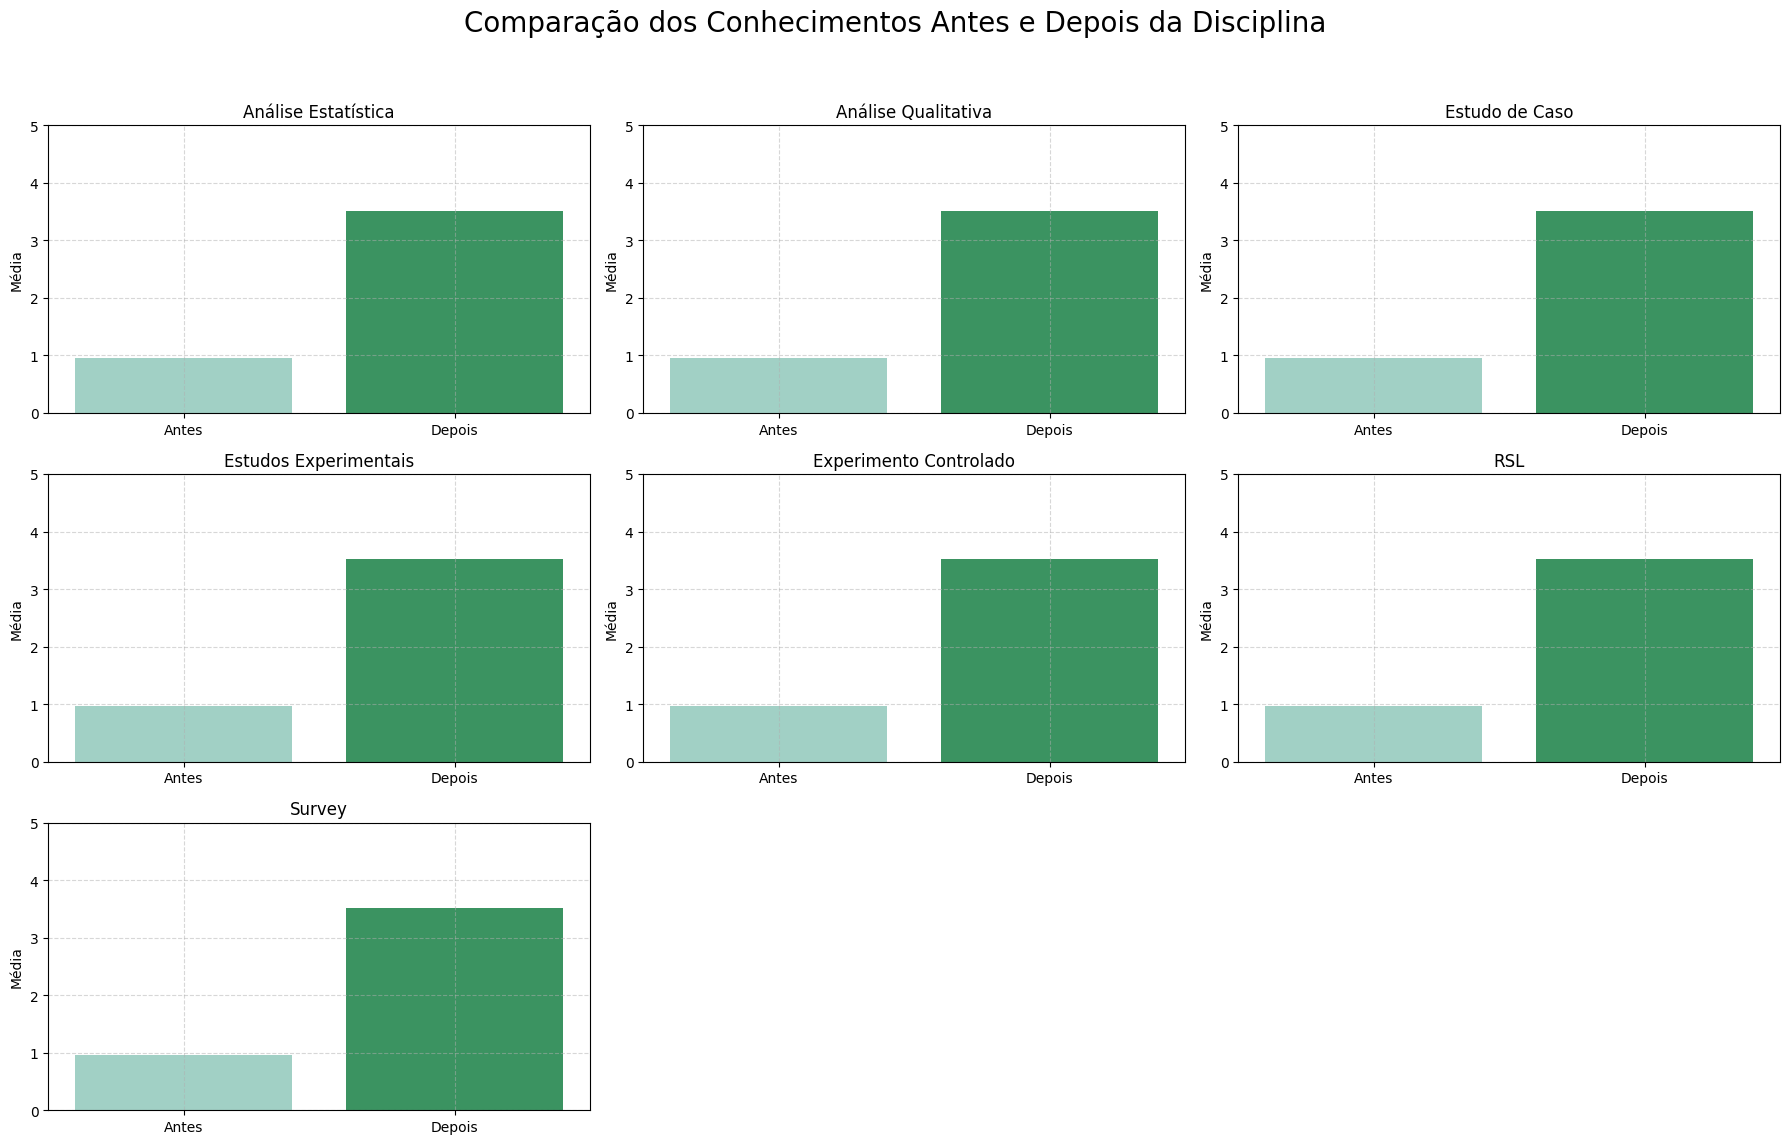

In [16]:
pares = [
    ("Conhecimento antes - Análise Estatística", "Conhecimento depois - Análise Estatística"),
    ("Conhecimento antes - Análise Qualitativa", "Conhecimento depois - Análise Qualitativa"),
    ("Conhecimento antes - Estudo de Caso", "Conhecimento depois - Estudo de Caso"),
    ("Conhecimento antes - Estudos Experimentais", "Conhecimento depois - Estudos Experimentais"),
    ("Conhecimento antes - Experimento Controlado", "Conhecimento depois - Experimento Controlado"),
    ("Conhecimento antes - RSL", "Conhecimento depois - RSL"),
    ("Conhecimento antes - Survey", "Conhecimento depois - Survey")
]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (antes, depois) in enumerate(pares):
    if col_antes in df.columns and col_depois in df.columns:
        medias = [df[col_antes].mean(), df[col_depois].mean()]
        sns.barplot(x=["Antes", "Depois"], y=medias, ax=axes[i], palette=['#99d8c9','#2ca25f'], hue=["Antes", "Depois"], dodge=False, legend=False)
        axes[i].set_title(f"{antes.split('-')[-1].strip()}")
        axes[i].set_ylim(0, 5)
        axes[i].set_ylabel('Média')
        axes[i].set_xlabel('')
        axes[i].grid(True, linestyle="--", alpha=0.5)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Comparação dos Conhecimentos Antes e Depois da Disciplina', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
